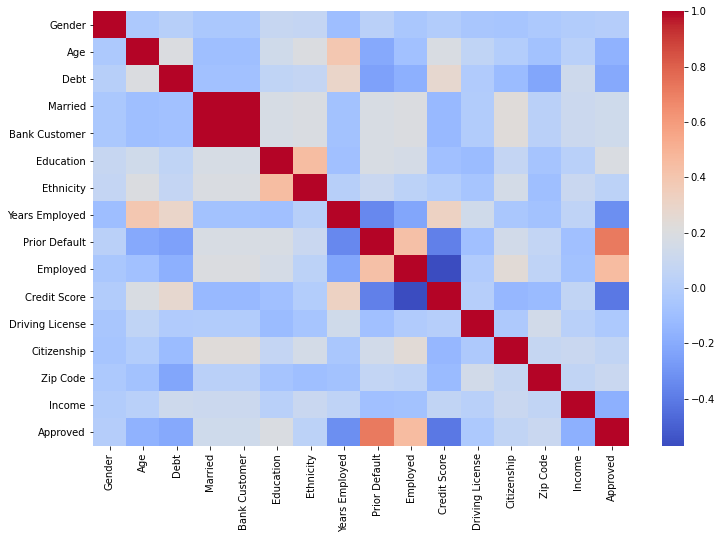

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


def filterDf(df, colNames):
    for cols in colNames:
        d = {}
        for i in df[cols]:
            if i not in d:
                d[i] = len(d)
        df[cols] = df[cols].map(d)

def handleMissingNumeric(df, colNames):
    for col in colNames:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].fillna(df[col].mean())

def fillUnknown(df, colNames):
    for col in colNames:
        temp = df[col].value_counts().to_dict()    
        if '?' in temp:
            temp['?'] = max(temp)

        for i in temp:
            if i!='?':
                temp[i] = i
        df[col] = df[col].map(temp)


headerRow = ['Gender', 'Age', 'Debt', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income', 'Approved']
df = pd.read_csv('crx.data', names = headerRow)

#To replace ? using pd
#df = df.replace('?', np.nan)
#df.fillna(method = 'ffill', inplace = True)

#To replace ? using mine
#fillUnknown(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship'])
handleMissingNumeric(df, ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income'])

#sns.distplot(df['Age'])
#filterDf(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

dim = (12, 8)
fig, ax = plt.subplots(figsize = dim)


#sns.countplot(data = df, x = 'Citizenship')
features = ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income']


#scaler = StandardScaler()
#df[features] = scaler.fit_transform(df[features])

#p = features[5]
#sns.distplot(df[p])

#sns.set()
#cols = ['Age', 'Income', 'Credit Score', 'Debt', 'Years Employed']
#sns.pairplot(df[cols], size = 2.5)
#plt.show();

filterDf(df, ['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

cMatrix = df.corr()
sns.heatmap(cMatrix, annot = False, cmap = 'coolwarm')


In [6]:
#fig, ax= plt.subplots()

#ax.scatter(df['Debt'], df['Age'])
#ax.set_xlabel('Debt')
#ax.set_ylabel('Age')


#df.columns = range(df.shape[1])
#predFeatures = range(df.shape[1] - 1)
#targetFeature = [df.shape[1] - 1]



def splitWoRandom(df, k):
    k = int(df.shape[0]*k)
    return (df[:k], df[k:])


#trainDf, testDf = train_test_split(df, test_size=0.3)
trainDf, testDf = splitWoRandom(df, 0.7)

x = ['Gender', 'Age', 'Debt','Married', 'Bank Customer', 'Education', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Citizenship', 'Zip Code', 'Income']
y = ['Approved']


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#trainAcc = []
#testAcc = []
from sklearn import metrics
list1=[]
for i in range(1, 16):
    
    dtc = DecisionTreeClassifier(max_depth = i ,random_state = 0)

    dtc.fit(trainDf[x], trainDf[y])

    trainPred = dtc.predict(trainDf[x])
    trainAcc.append(score(trainPred, trainDf[y])*100)
    
    #print(round(score(trainPred, trainDf[y]), 4))

    testPred = dtc.predict(testDf[x])
    testAcc.append(score(testPred, testDf[y])*100)
    
    list1.append([i,metrics.accuracy_score(trainPred, trainDf[y]),metrics.accuracy_score(testPred, testDf[y])])
    
    #print('Test : ', score(testPred, testDf[y]))



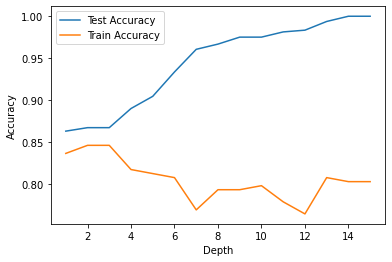

In [8]:
#data3 = np.column_stack((testAcc,trainAcc))
from pandas import DataFrame
df2 = DataFrame (list1,columns=['Depth','Test Accuracy','Train Accuracy'])
plt.plot(df2['Depth'],df2['Test Accuracy'],label='Test Accuracy')
plt.plot(df2['Depth'],df2['Train Accuracy'],label='Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
0,0,30.83,0.000,0,0,0,0,1.250,0,0,1,0,0,202.0,0,0
1,1,58.67,4.460,0,0,1,1,3.040,0,0,6,0,0,43.0,560,0
2,1,24.50,0.500,0,0,1,1,1.500,0,1,0,0,0,280.0,824,0
3,0,27.83,1.540,0,0,0,0,3.750,0,0,5,1,0,100.0,3,0
4,0,20.17,5.625,0,0,0,0,1.710,0,1,0,0,1,120.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0,39.17,2.500,1,1,9,1,10.000,1,1,0,1,1,200.0,0,1
478,0,22.75,11.500,0,0,9,0,0.415,1,1,0,0,0,0.0,0,1
479,2,26.50,2.710,1,1,14,6,0.085,1,1,0,0,1,80.0,0,1
480,1,16.92,0.500,0,0,9,0,0.165,1,0,6,1,0,240.0,35,1


In [13]:
testDf

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Citizenship,Zip Code,Income,Approved
482,1,17.33,9.500,0,0,11,0,1.750,1,0,10,1,0,0.0,10,1
483,0,23.75,0.415,1,1,6,0,0.040,1,0,2,0,0,128.0,6,1
484,0,34.67,1.080,0,0,2,0,1.165,1,1,0,0,1,28.0,0,1
485,0,74.83,19.000,1,1,12,3,0.040,1,0,2,0,0,0.0,351,1
486,0,28.17,0.125,1,1,5,0,0.085,1,1,0,0,0,216.0,2100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,21.08,10.085,1,1,10,1,1.250,1,1,0,0,0,260.0,0,1
686,1,22.67,0.750,0,0,6,0,2.000,1,0,2,1,0,200.0,394,1
687,1,25.25,13.500,1,1,12,3,2.000,1,0,1,1,0,200.0,1,1
688,0,17.92,0.205,0,0,11,0,0.040,1,1,0,0,0,280.0,750,1
